In [1]:
#HW3-Problem 1
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib.ticker import FormatStrFormatter 

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus']=False


In [2]:
#数据处理
nc = xr.open_dataset("F:/NOAA_NCDC_ERSST_v3b_SST.nc") # 读取nc文件
sst = nc["sst"].values # 将sst数据作为一个四维数组存进sst

sst_ave = np.zeros(12, dtype=float) # sst_ave储存1960-2016时段月气候态
for i in range(12):
    sst_ave[i] = sst[i:684:12, 42:47, 95:121].mean()
nino = np.zeros(682, dtype=float) # nino储存1960-2016指数
iii = 0
ii = 0
for i in range(682):
    nino[i] = sst[i:i+3:1, 42:47, 95:121].mean() - sst_ave[i-12*iii]
    ii = ii + 1
    if ii == 12:
        iii = iii+1
        ii = 0


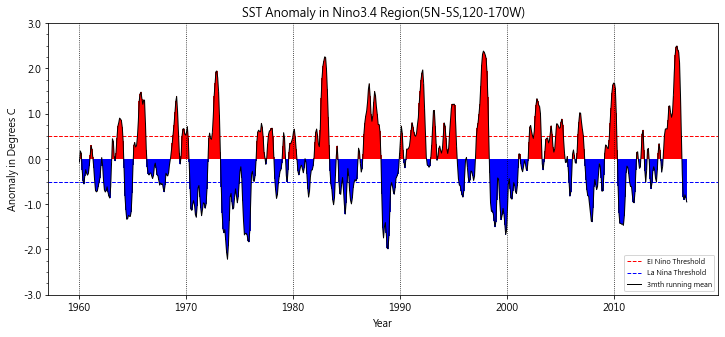

In [3]:
#数据画图
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
dates = []
for year in range(1960, 2017):
    for month in range(1, 13):
        dates.append(dt.date(year=year, month=month, day=1))

mycolor = []

for i in range(len(nino)):
    if nino[i] >= 0:
        mycolor.append("red")
    else:
        mycolor.append("blue")

ax1.grid(axis="x", color="k", linestyle=":", linewidth=0.8) # 网格线
ax1.axhline(y=0.5, c="r", ls="--", lw=1.0, label="EI Nino Threshold")
ax1.axhline(y=-0.5, c="b", ls="--", lw=1.0, label="La Nina Threshold") 
ax1.bar(dates[1:-1:1], nino[:], color=mycolor, width=50.0)
ax1.plot(dates[1:-1:1], nino[:], linewidth=1.0, color="k", linestyle="-", label="3mth running mean") #指数线
ax1.set_ylim(-3,3)
ax1.legend(loc="lower right", fontsize="x-small")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.xlabel("Year")
plt.ylabel("Anomaly in Degrees C")
plt.title("SST Anomaly in Nino3.4 Region(5N-5S,120-170W)")

fig.savefig("F:/nino.png", dpi=600)
